<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/4_efficientdet/train%20-%20with%20validation%20dataset.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/4_efficientdet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/4_efficientdet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/4_efficientdet/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# About the network

1. Paper on EfficientDet: https://arxiv.org/abs/1911.09070

2. Blog 1 on EfficientDet: https://towardsdatascience.com/efficientdet-scalable-and-efficient-object-detection-review-4472ffc34fd9

3. Blog 2 on EfficientDet: https://medium.com/@nainaakash012/efficientdet-scalable-and-efficient-object-detection-ea05ccd28427

# COCO Format - 1

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |                |-------Val (set_dir) (Validation)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)  
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------instances_Val.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Train";
 
For ValSet
 - root_dir = "..sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Val";
 
 Note: Annotation file name too coincides against the set_dir

# COCO Format - 2

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---ImagesVal (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------instances_ImagesVal.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesTrain";
 
 
  For ValSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesVal";
 
 Note: Annotation file name too coincides against the set_dir
 

# Sample Dataset Credits

    credits: https://github.com/experiencor/kangaroo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [2]:
from train_detector import Detector

../../4_efficientdet/lib/train_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
gtf = Detector();

In [4]:
#USing training set structured in format 1
root_dir = "Monk_Object_Detection/example_notebooks/sample_dataset";
coco_dir = "kangaroo";
img_dir = "images";
set_dir = "Images";

In [5]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [6]:
#Using training set same as validation but structured in format 2
root_dir = "Monk_Object_Detection/example_notebooks/sample_dataset";
coco_dir = "kangaroo";
img_dir = "./";
set_dir = "Images";

In [7]:
gtf.Val_Dataset(root_dir, coco_dir, img_dir, set_dir)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [1]:
# Available models
# model_name="efficientnet-b0"
# model_name="efficientnet-b1"
# model_name="efficientnet-b2"
# model_name="efficientnet-b3"
# model_name="efficientnet-b4"
# model_name="efficientnet-b5"
# model_name="efficientnet-b6"
# model_name="efficientnet-b7"
# model_name="efficientnet-b8"

In [8]:
gtf.Model(model_name="efficientnet-b0");

# To resume training
#gtf.Model(model_name="efficientnet-b0", load_pretrained_model_from="path to model.pth");

Loaded pretrained weights for efficientnet-b0


In [9]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [9]:
gtf.Train(num_epochs=2, model_output_dir="trained/");


Epoch: 1/2. Classification loss: 0.70268. Regression loss: 0.98241. Total loss: 1.68509


/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type EfficientDet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_4_efficientdet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for 


Epoch: 2/2. Classification loss: 0.54227. Regression loss: 0.95224. Total loss: 1.49452


# Inference 

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [2]:
from infer_detector import Infer

../../4_efficientdet/lib/infer_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_dir="trained/")

In [5]:
class_list = ["kangaroo"];

In [6]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg1.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);

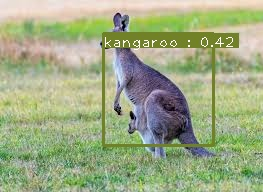

In [7]:
from IPython.display import Image
Image(filename='output.jpg') 